# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st
import json

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for GET requests to retrieve city data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List for holding reponse information
lon = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lat = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("-------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data in sets of 50 cities,
    # with 5 seconds sleep time, and then continue
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | vostok
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | galesong
Processing Record 4 of Set 1 | bathsheba
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | makarska
Processing Record 7 of Set 1 | shaoyang
Processing Record 8 of Set 1 | kodino
Processing Record 9 of Set 1 | bradford
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | waipawa
Processing Record 13 of Set 1 | lebedinyy
Processing Record 14 of Set 1 | rabo de peixe
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | celestun
Processing Record 18 of Set 1 | rocha
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | cacu
Processing Record 22 of Set 1 | broken hill
Processing Record 23 of Set 1 | atuona
Processing Recor

Processing Record 37 of Set 4 | pergamino
Processing Record 38 of Set 4 | mareeba
Processing Record 39 of Set 4 | gidam
Processing Record 40 of Set 4 | umm lajj
Processing Record 41 of Set 4 | mikuni
Processing Record 42 of Set 4 | grindavik
Processing Record 43 of Set 4 | ocos
Processing Record 44 of Set 4 | pyapon
Processing Record 45 of Set 4 | depew
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | vizinga
Processing Record 48 of Set 4 | mahaicony
City not found. Skipping...
Processing Record 49 of Set 4 | surgut
Processing Record 50 of Set 4 | zhuhai
Processing Record 1 of Set 5 | khash
Processing Record 2 of Set 5 | ust-nera
Processing Record 3 of Set 5 | cruzeiro do oeste
Processing Record 4 of Set 5 | stepnyak
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | rorvik
Processing Record 7 of Set 5 | new norfolk
Processing Record 8 of Set 5 | roald
Processing Record 9 of Set 5 | corbii mari
Processing Record 10 of Set 5 | hay river
Proces

Processing Record 29 of Set 8 | solnechnyy
Processing Record 30 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 8 | cidreira
Processing Record 32 of Set 8 | san ramon
Processing Record 33 of Set 8 | kihei
Processing Record 34 of Set 8 | acapulco
Processing Record 35 of Set 8 | bilma
Processing Record 36 of Set 8 | summerville
Processing Record 37 of Set 8 | eyrarbakki
Processing Record 38 of Set 8 | clyde river
Processing Record 39 of Set 8 | kharp
Processing Record 40 of Set 8 | amahai
Processing Record 41 of Set 8 | sompeta
Processing Record 42 of Set 8 | valparaiso
Processing Record 43 of Set 8 | labuhan
Processing Record 44 of Set 8 | harwich
Processing Record 45 of Set 8 | nanpiao
Processing Record 46 of Set 8 | chingirlau
Processing Record 47 of Set 8 | itarema
Processing Record 48 of Set 8 | clearlake
Processing Record 49 of Set 8 | macusani
Processing Record 50 of Set 8 | virden
Processing Record 1 of Set 9 | vung tau
Processing Record 2 of Set 9 |

Processing Record 16 of Set 12 | toliary
City not found. Skipping...
Processing Record 17 of Set 12 | udachnyy
Processing Record 18 of Set 12 | along
Processing Record 19 of Set 12 | maarianhamina
Processing Record 20 of Set 12 | aklavik
Processing Record 21 of Set 12 | port macquarie
Processing Record 22 of Set 12 | qeshm
Processing Record 23 of Set 12 | mormugao
Processing Record 24 of Set 12 | richards bay
Processing Record 25 of Set 12 | gawler
Processing Record 26 of Set 12 | fuengirola
Processing Record 27 of Set 12 | beeville
Processing Record 28 of Set 12 | baraboo
Processing Record 29 of Set 12 | ribeira grande
Processing Record 30 of Set 12 | azuaga
Processing Record 31 of Set 12 | odweyne
Processing Record 32 of Set 12 | satitoa
City not found. Skipping...
Processing Record 33 of Set 12 | kamaishi
Processing Record 34 of Set 12 | farmington
Processing Record 35 of Set 12 | benguela
Processing Record 36 of Set 12 | campo verde
Processing Record 37 of Set 12 | nan
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

weather = pd.DataFrame(cities_df)
weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vostok,46.4856,135.8833,31.05,75.0,7.0,8.75,RU,1.677472e+09
1,bluff,-46.6000,168.3333,63.81,68.0,43.0,4.41,NZ,1.677472e+09
2,galesong,-5.3166,119.3661,86.02,75.0,98.0,12.91,ID,1.677472e+09
3,bathsheba,13.2167,-59.5167,77.61,73.0,75.0,11.50,BB,1.677472e+09
4,hilo,19.7297,-155.0900,70.25,89.0,100.0,10.36,US,1.677472e+09


In [5]:
new_frame = weather.describe()
new_frame

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.866372,13.620663,51.575089,73.595745,56.682624,8.195035,1.677472e+09
std,33.652383,90.463347,29.300256,20.164150,40.583843,6.036190,1.070633e+02
min,-54.800000,-179.166700,-32.580000,13.000000,0.000000,0.000000,1.677472e+09
25%,-6.848625,-65.976050,33.517500,64.000000,12.000000,3.530000,1.677472e+09
50%,26.184600,17.092250,60.960000,78.000000,74.000000,6.870000,1.677472e+09
75%,48.369925,86.662525,75.225000,88.000000,99.000000,11.360000,1.677472e+09
max,78.218600,178.416700,93.250000,100.000000,100.000000,37.980000,1.677473e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_101 = cities_df[(cities_df["Humidity"] > 100)].index
humidity_101

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(humidity_101, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vostok,46.4856,135.8833,31.05,75.0,7.0,8.75,RU,1.677472e+09
1,bluff,-46.6000,168.3333,63.81,68.0,43.0,4.41,NZ,1.677472e+09
2,galesong,-5.3166,119.3661,86.02,75.0,98.0,12.91,ID,1.677472e+09
3,bathsheba,13.2167,-59.5167,77.61,73.0,75.0,11.50,BB,1.677472e+09
4,hilo,19.7297,-155.0900,70.25,89.0,100.0,10.36,US,1.677472e+09
...,...,...,...,...,...,...,...,...,...
608,oriximina,-1.7656,-55.8661,73.94,95.0,100.0,2.33,BR,1.677473e+09
609,cotonou,6.3654,2.4183,80.69,88.0,97.0,10.09,BJ,1.677473e+09
610,cap-aux-meules,47.3821,-61.8597,6.82,85.0,96.0,3.44,CA,1.677473e+09
611,ostersund,63.1792,14.6357,36.61,87.0,97.0,19.57,SE,1.677473e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

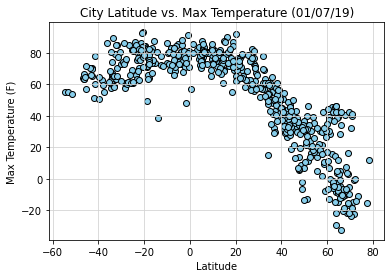

In [8]:
plt.scatter(weather["Lat"],weather["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

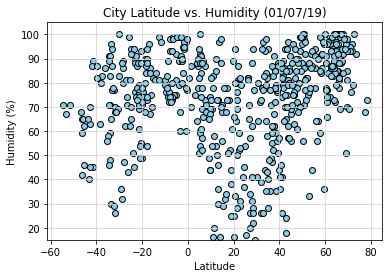

In [9]:
plt.scatter(weather["Lat"],weather["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

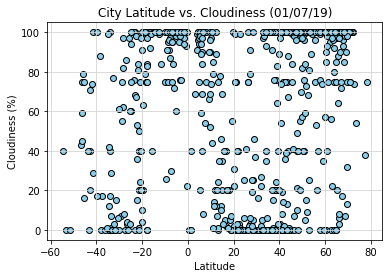

In [10]:
plt.scatter(weather["Lat"],weather["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

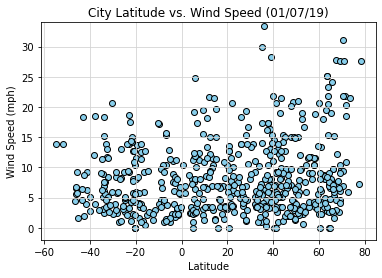

In [11]:
plt.scatter(weather["Lat"],weather["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [12]:
# Create a function to create Linear Regression plots for remaining activities
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.780677508368817
The correlation between both factors is -0.88


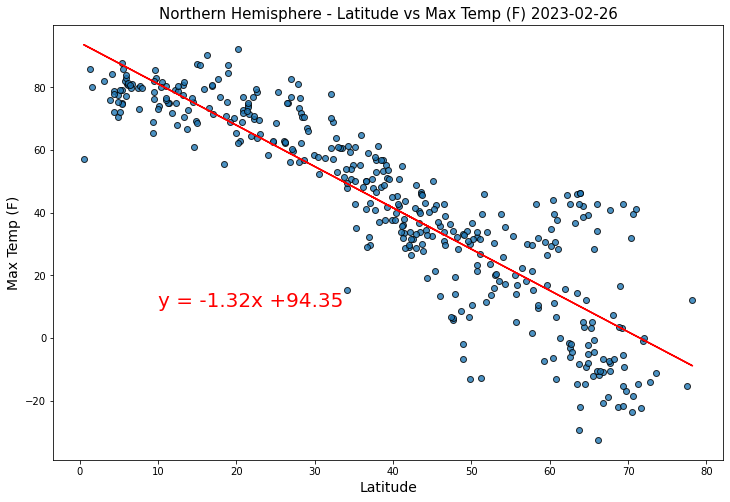

In [14]:
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Save the figure
plt.savefig("./output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1839504267022615
The correlation between both factors is 0.43


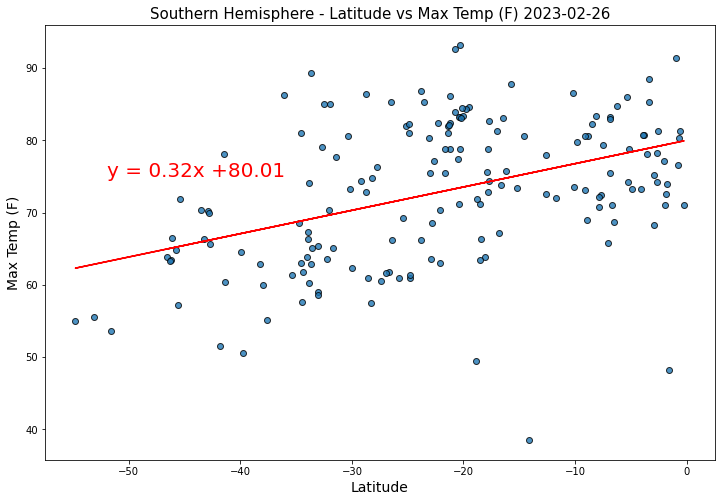

In [15]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df["Lat"]
y_values = southern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

# Save the figure
plt.savefig("./output_data/southern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

The correlation between latitude and maximum temperature is strong for both the hemispheres. It is higher for northern hemisphere, indicating that as we move away from the equator, the maximum temperature keeps dropping in a more linear manner.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17556540794184994
The correlation between both factors is 0.42


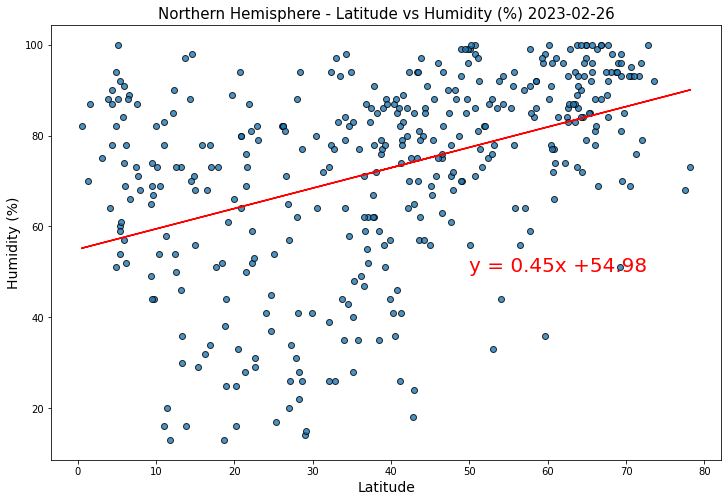

In [16]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("./output_data/northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17740387983168465
The correlation between both factors is 0.42


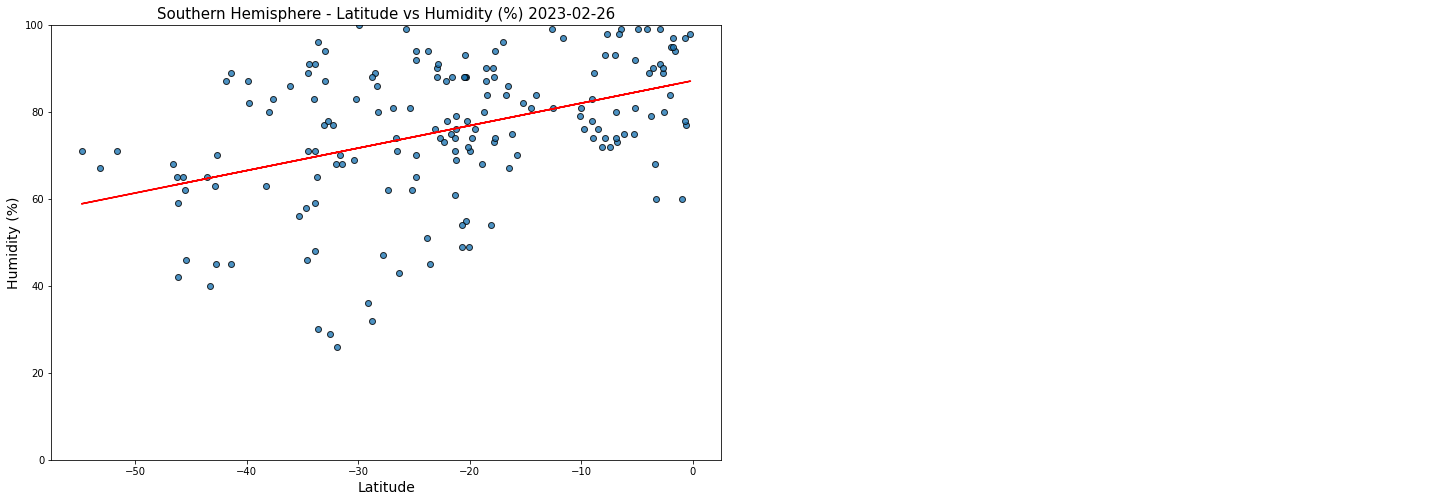

In [17]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("./output_data/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

There is no correlation between latitude and humidity for southern hemisphere (0.35). For northern hemisphere, it is the same case, expect for the higher latitudes, where we can see some correlation (but not very strong).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06188974780178766
The correlation between both factors is 0.25


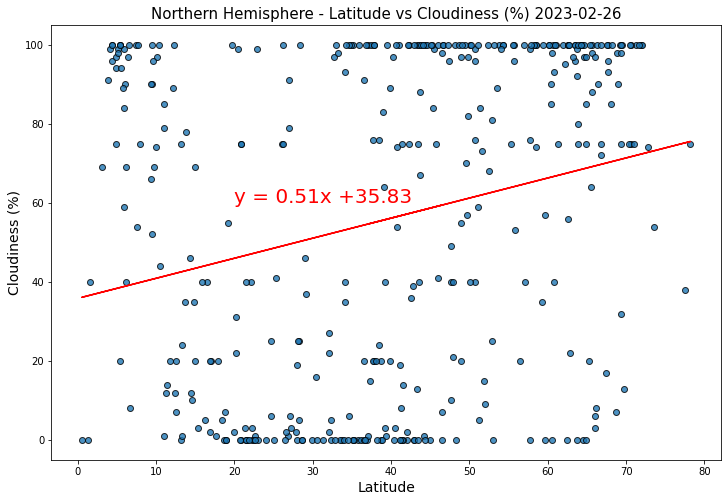

In [18]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("./output_data/northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28526082094423816
The correlation between both factors is 0.53


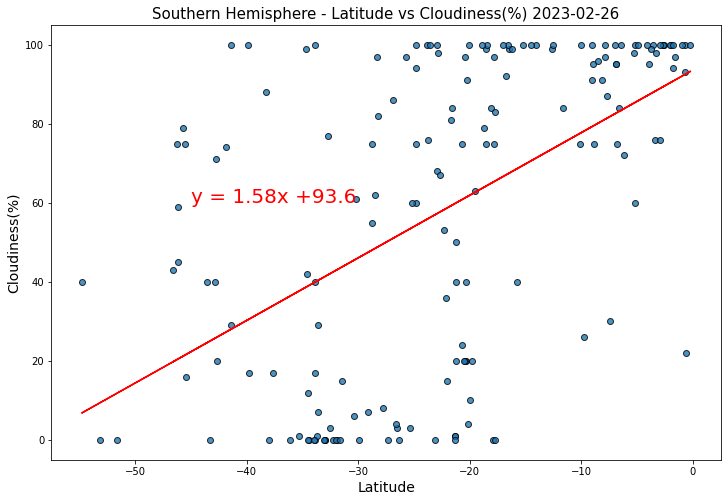

In [19]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

There is no correlation between latitude and cloudiness for both, southern and northern hemispheres. Both show scattered values all over the plots.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015151011434373831
The correlation between both factors is 0.12


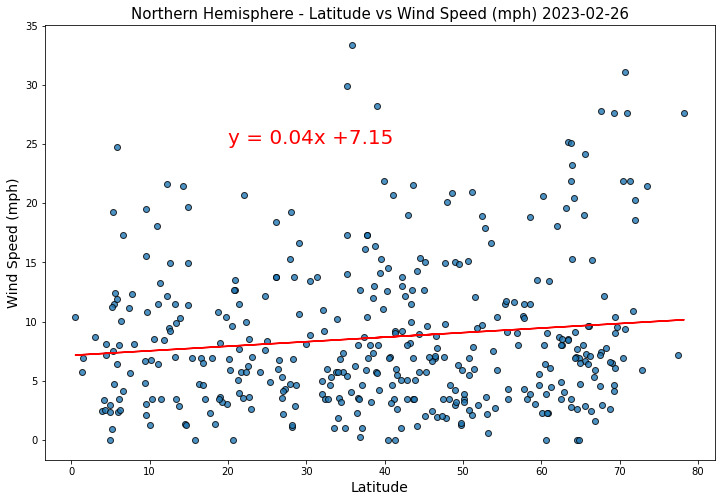

In [20]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04094508824487365
The correlation between both factors is -0.2


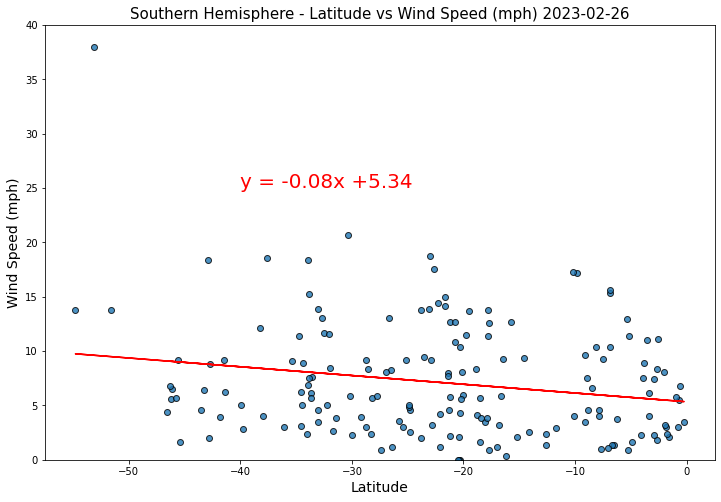

In [21]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

There is no correlation between latitude and wind speed either, for both hemispheres. Both show evenly scattered values over the latitudes.